# Python Notebook

Use python to generate equally attractive plots that follow the same style as we have seen with MATLAB.

In [7]:
from utils.fig2py import * 

### Data 

#### (instead of generating new data, import figure file data from the MATLAB folder)

In [8]:
fig_file_loc = '../MATLAB/Figs/line' # <-- same line.fig 
fname = fig_file_loc.split('/')[-1]

In [9]:
plot_data = fig2py(fig_file_loc) # EXTRACTS X-Y DATA FROM A FIG FILE

### Set plot style

In [10]:
import matplotlib.pyplot as plt

# Now, apply your custom style sheet
plt.style.use('utils/style_file/publication.mplstyle')

#### MPLSTYLE file has all the static plot design parameters.

# Choose color scheme

There are three primary categories of colormaps:

**Sequential Colormaps:** These are suitable for data that progresses from low to high values, often used to represent data that varies in magnitude. Common examples of sequential colormaps are:

'viridis': A bright, vibrant spectrum starting from a dark blue, progressing through green and ending in yellow.
'plasma': Similar to 'viridis' but transitions from a deep blue to a bright, almost neon, yellow.
'inferno': This colormap starts with black, transitions through reds and oranges, and culminates in a bright yellow.
'magma': It begins with black, moves through various shades of purple, and ends in a light pink.

---



**Diverging Colormaps:** These are ideal for data that has a natural midpoint, often used in situations where data deviates around a central value. They are particularly effective in highlighting both the deviation and the direction of the data. Notable examples include:

'coolwarm': This colormap transitions from a cool blue to a warm red, emphasizing the midpoint in data.
'seismic': A high-contrast map moving from dark blue, through white, to dark red.
'PiYG': A playful combination of pink and green hues, diverging from a neutral center.


---



**Qualitative Colormaps:** Designed for categorical data where each color represents a distinct category. These colormaps are not intended for data that has ordering or magnitude. They are used to distinguish discrete elements or groups. Examples in this category are:

'tab10': A set of ten colors designed to be distinct from one another.
'tab20': Similar to 'tab10' but includes twenty colors for more complex categorizations.
'Pastel1': A collection of soft, pastel colors.
'Set3': This colormap offers a broad range of colors, suitable for representing a larger number of categories.


In [11]:
from cycler import cycler
import numpy as np
import matplotlib.ticker as ticker

# Example: Generate colors from the 'magma' colormap
num_colors = 4
colors = plt.cm.magma(np.linspace(0, 1, num_colors))

# Update rcParams with generated color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

### Plot and enhance

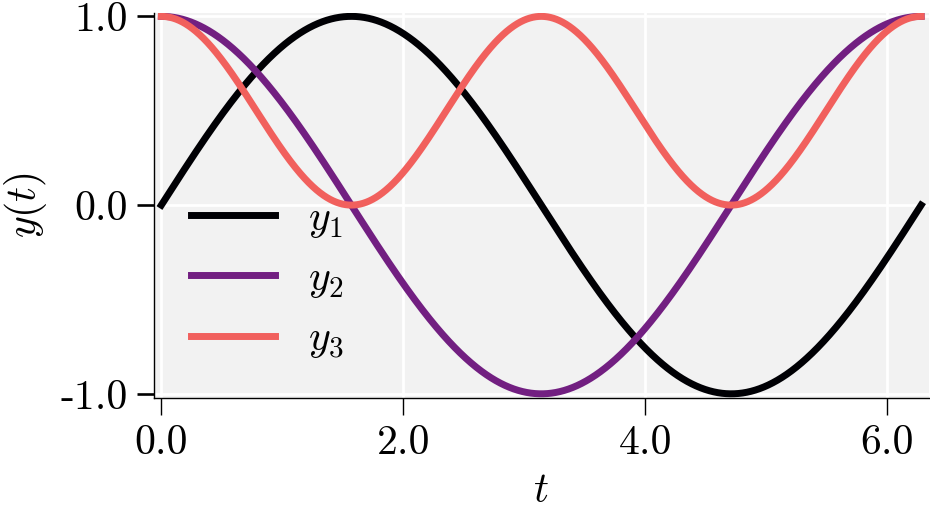

In [12]:
# Plot data
fig, ax = plt.subplots(figsize=(5,2.5))

for i in range(len(plot_data)):
    ax.plot(plot_data[i]['XData'][0],plot_data[i]['YData'][0])
    # ax.fill_between(plot_data[i]['XData'][0],plot_data[i]['YData'][0])
    # ax.scatter(plot_data[i]['XData'][0],plot_data[i]['YData'][0])
    # ax.hist(plot_data[i]['Data'][0],11)

# Label axis
# ax.set_ylabel("Weight (kg)")
# ax.set_xlabel("Height (cm)")

ax.set_ylabel("$y(t)$")
ax.set_xlabel("$t$")

# Automatically adjust the axis limits to be tight around the data
ax.autoscale(axis='both', tight=True)

# Add legend
plt.legend(['$y_1$','$y_2$','$y_3$'])


# Set the format for tick labels
import matplotlib.ticker as ticker
format_str = '%.1f'  # Two decimal places; adjust as needed
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(format_str))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(format_str))


# Display the figure
plt.margins(0.01)
plt.savefig('Examples/'+fname+'.pdf')
plt.show()
